<a href="https://colab.research.google.com/github/Naru2413/data-2/blob/main/data_tsk_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (51290, 24)

Missing Values:
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

First 5 Rows:
    Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28

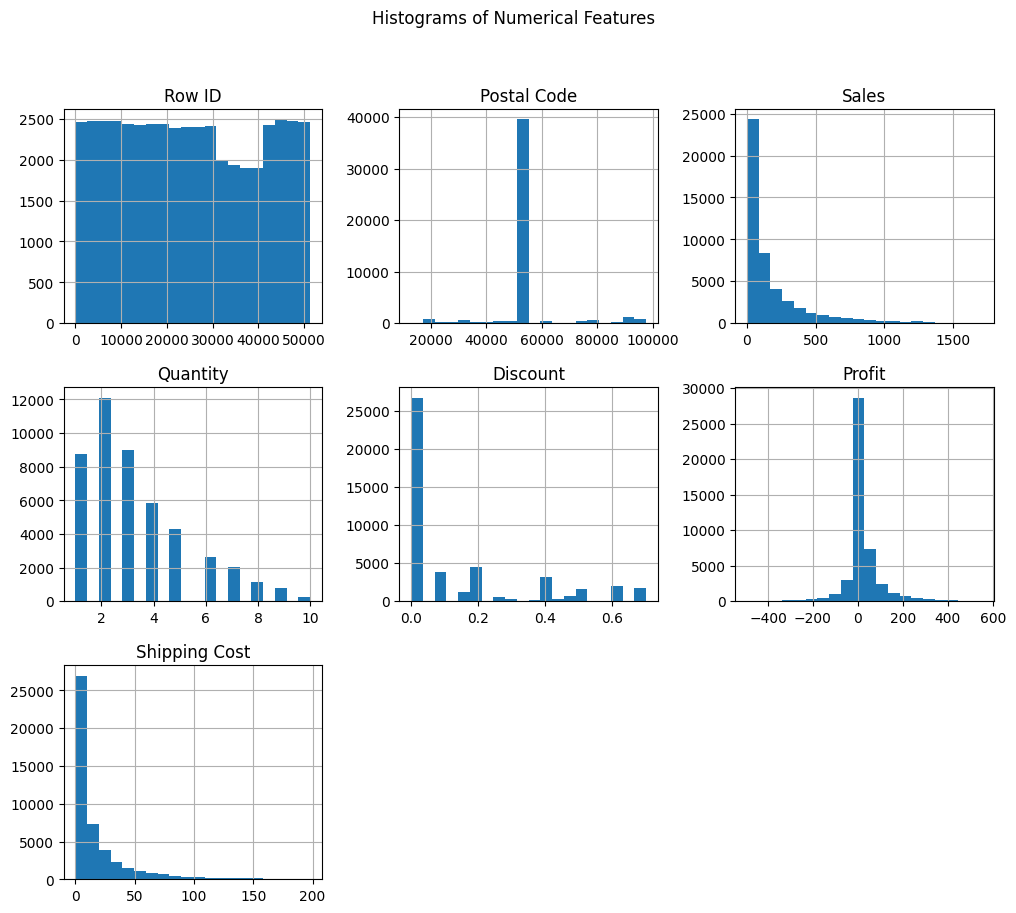

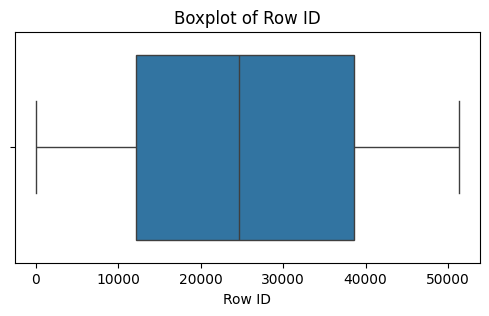

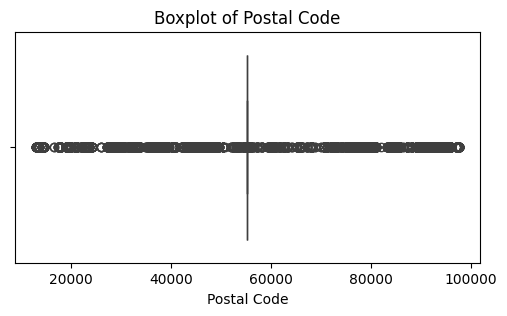

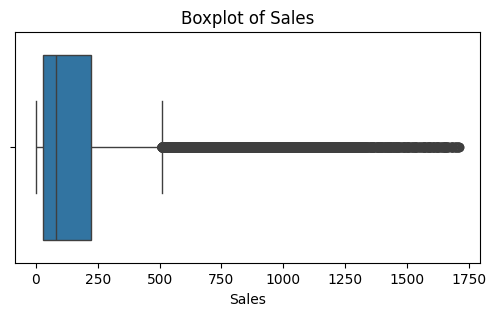

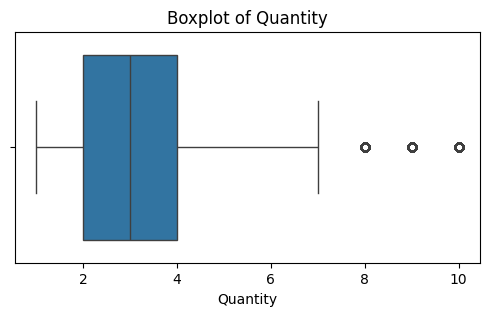

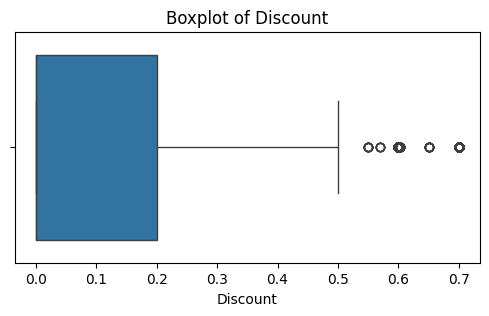

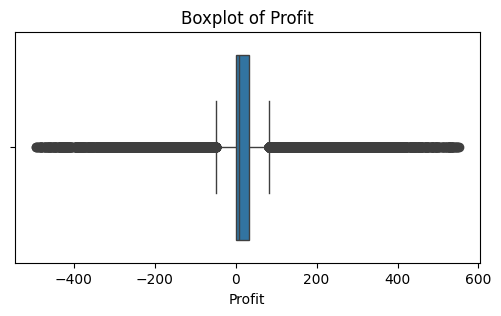

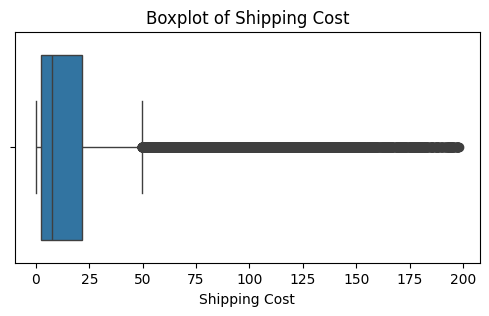

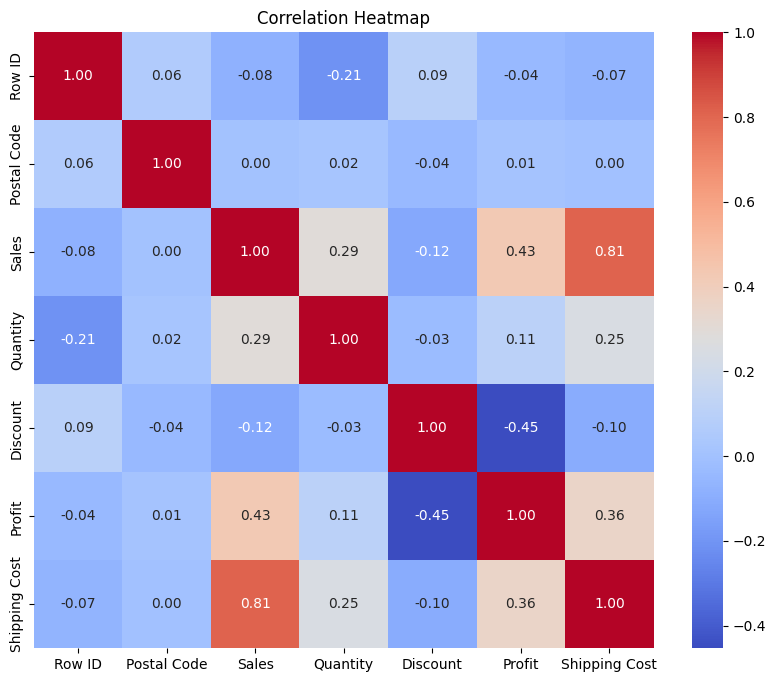

Summary Report:
• Total rows after cleaning: 46806
• Columns with missing values handled.
• Outliers removed using Z-score.
• Trends and patterns visualized using histogram, boxplot, and heatmap.


In [4]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Load dataset
df = pd.read_csv('Global_Superstore.csv', encoding='latin1')  # Use encoding='utf-8' or 'latin1' based on file

# 👁️ View basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

# 🧹 Clean Data

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detect and remove outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# 📊 Statistical Summary
print("\nDescriptive Statistics:\n", df.describe())

# 🔗 Correlation Matrix
correlation = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation)

# 📈 Data Visualization

# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots to detect outliers
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 📄 Summary Report
print("Summary Report:")
print("• Total rows after cleaning:", df.shape[0])
print("• Columns with missing values handled.")
print("• Outliers removed using Z-score.")
print("• Trends and patterns visualized using histogram, boxplot, and heatmap.")